In [169]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import run_supervised_models as rsm

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


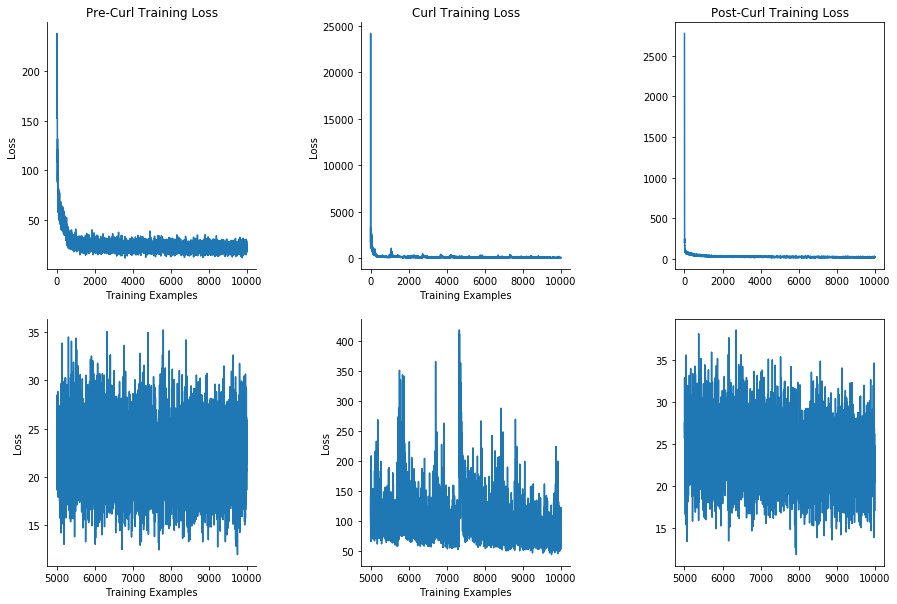

In [91]:
# plot training loss
losses = np.load('baseline_losses.npy')
f,ax = plt.subplots(2,3,figsize=[15,10])
f.subplots_adjust(wspace=.5)
pre_curl_losses, curl_losses, post_curl_losses = losses[:int(1E4)],losses[int(1E4):int(2E4)],losses[int(2E4):int(3E4)]


ax[0,0].plot(pre_curl_losses)
ax[0,0].set_title("Pre-Curl Training Loss")
ax[1,0].plot(np.arange(1E4-5000,1E4),pre_curl_losses[-5000:])


ax[0,1].plot(curl_losses)
ax[0,1].set_title("Curl Training Loss")
ax[1,1].plot(np.arange(1E4-5000,1E4),curl_losses[-5000:])

ax[0,2].plot(post_curl_losses)
ax[0,2].set_title("Post-Curl Training Loss")
ax[1,2].plot(np.arange(1E4-5000,1E4),post_curl_losses[-5000:])

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xlabel("Training Examples")
        ax[i,j].set_ylabel("Loss")
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        
f.savefig('baseline_training_losses.pdf',format="pdf")
f.savefig('baseline_training_losses.png',format="png")



In [92]:
# baseline with curl field
model = torch.load('baseline_model.pt',map_location=torch.device("cpu"))
# instantiate baseline train test class
bm = rsm.baseline_model()
# set model as the previously fit model

bm.model= model
bm.data_gen.curl=True

/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing th

torch.Size([50, 3, 100]) torch.Size([50, 6, 100]) torch.Size([50, 6, 100]) torch.Size([50, 6, 100]) torch.Size([50, 128, 100])


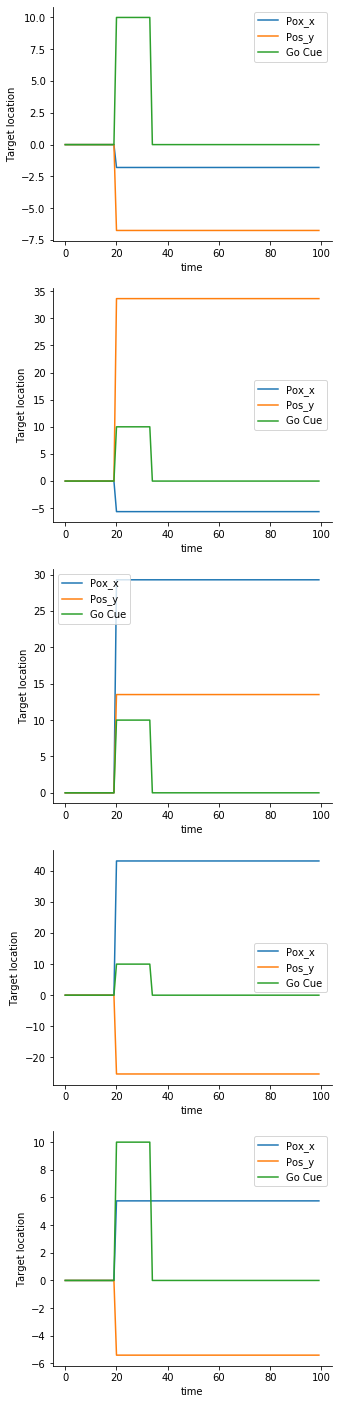

In [94]:
# plot example inputs
X,Y,YHAT,CURL,hidden = bm.test_batch(50)
print(X.shape,Y.shape,YHAT.shape,CURL.shape,hidden.shape)

f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(X[j,:,:].T)
    ax[j].set_ylabel("Target location")
    ax[j].set_xlabel("time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].legend(('Pox_x','Pos_y','Go Cue'))
f.savefig('Baseline Inputs.pdf',format="pdf")
f.savefig('Baseline Inputs.png',format="png")



IndexError: index 2 is out of bounds for dimension 1 with size 2

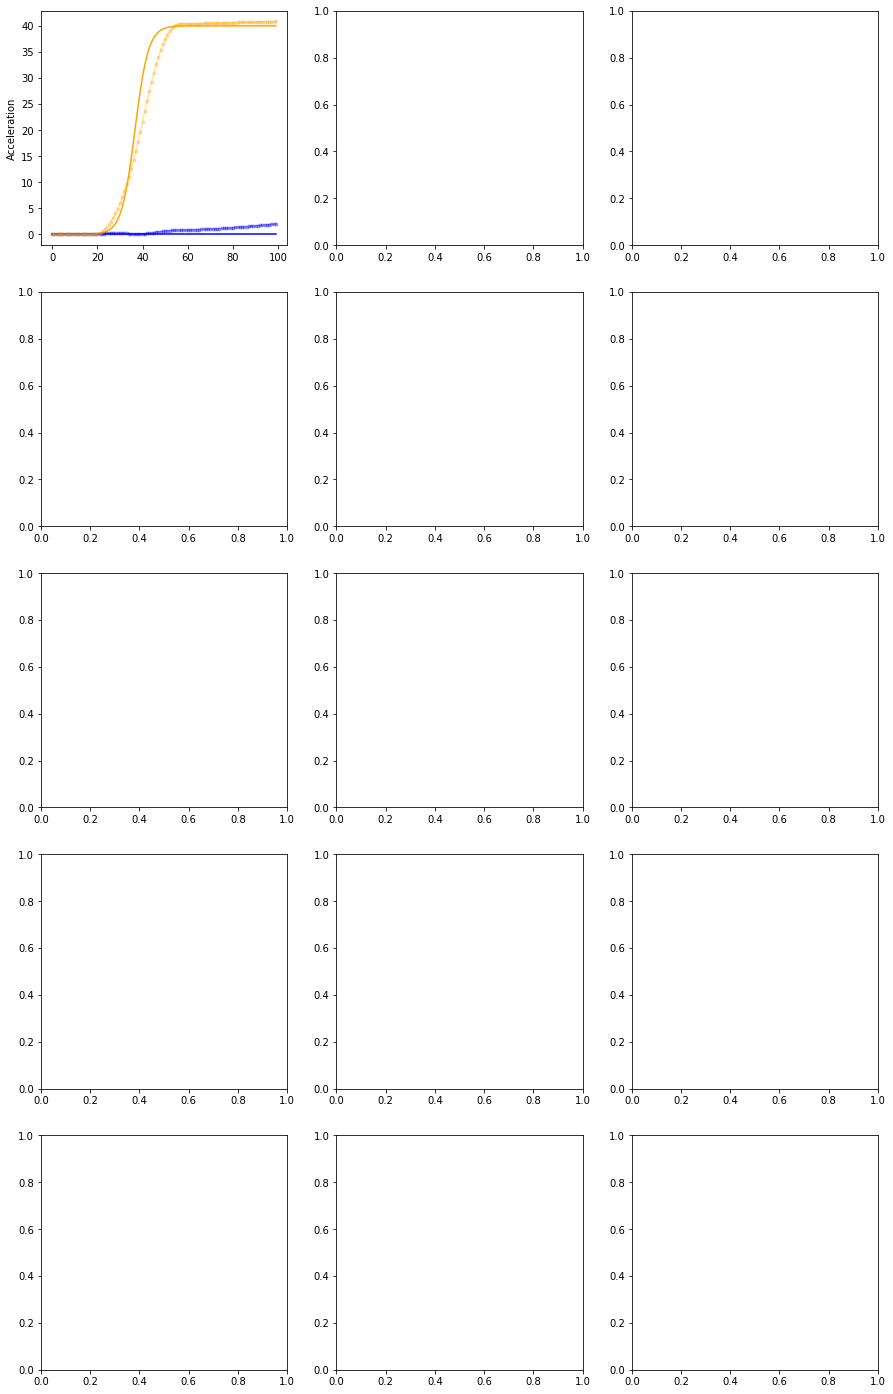

In [150]:
# plot example output kinematics 
f,ax = plt.subplots(5,3,figsize=[15,25])
for j in range(5):
    ax[j,0].plot(Y[j,0,:].T,color='blue')
    ax[j,0].plot(Y[j,1,:].T,color='orange')
    ax[j,0].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j,0].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j,0].set_ylabel("Acceleration")
    
    ax[j,1].plot(Y[j,2,:].T,color='blue')
    ax[j,1].plot(Y[j,3,:].T,color='orange')
    ax[j,1].plot(YHAT[j,2,:].T,color='blue',marker='.',alpha=.3)
    ax[j,1].plot(YHAT[j,3,:].T,color='orange',marker='.',alpha=.3)
    ax[j,1].set_ylabel("Velocity")
    
    ax[j,2].plot(Y[j,4,:].T,color='blue')
    ax[j,2].plot(Y[j,5,:].T,color='orange')
    ax[j,2].plot(YHAT[j,4,:].T,color='blue',marker='.',alpha=.3)
    ax[j,2].plot(YHAT[j,5,:].T,color='orange',marker='.',alpha=.3)
    ax[j,2].set_ylabel("position")
    
    for k in range(3):
        ax[j,k].set_xlabel("Time")
        ax[j,k].spines['top'].set_visible(False)
        ax[j,k].spines['right'].set_visible(False)
        
    
f.savefig('baseline_example_outputs.pdf',format='pdf')
f.savefig('baseline_example_outputs.png',format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red')
ax.plot(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue')
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig('baseline_example_trajectories.pdf',format='pdf')
f.savefig('baseline_example_trajectories.png',format='png')


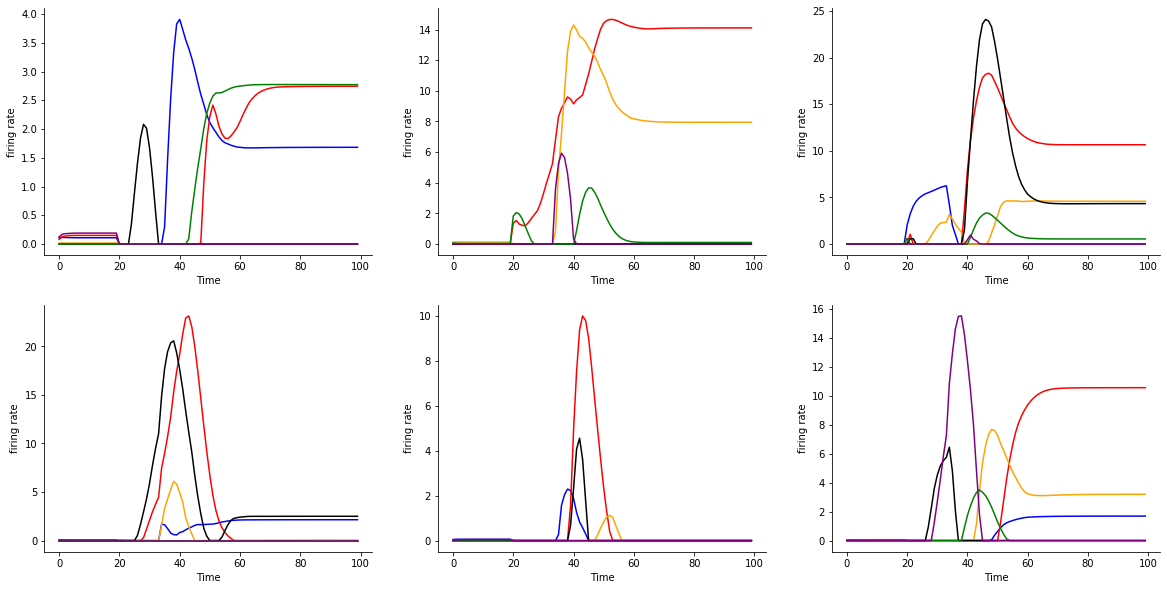

In [95]:
f,ax = plt.subplots(2,3,figsize=[20,10])
colors = np.array(['blue','red','orange','black','green','purple'])
n = 0
for i in range(2):
    for j in range(3):
        for k in range(6):
            ax[i,j].plot(hidden[k,n,:],color=colors[k])
            ax[i,j].set_ylabel("firing rate")

            ax[i,j].set_xlabel("Time")
            ax[i,j].spines['top'].set_visible(False)
            ax[i,j].spines['right'].set_visible(False)
            n+=1
        
f.savefig('baseline_pre_curl_example_hiddenUnitsByConditions.pdf',format='pdf')
f.savefig('baseline_pre_curl_example_hiddenUnitsByConditions.png',format='png')

In [151]:
# baseline with curl field
model = torch.load('baseline_with_curl.pt',map_location=torch.device("cpu"))
# instantiate baseline train test class
bm = rsm.baseline_model()
# set model as the previously fit model

bm.model= model
bm.data_gen.curl=True

/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing th

In [152]:
# plot example inputs
X,Y,YHAT,CURL = bm.test_batch(50)
print(X.shape,Y.shape,YHAT.shape,CURL.shape)

f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(X[j,:,:].T)
    ax[j].set_ylabel("Target location")
    ax[j].set_xlabel("time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].legend(('Pox_x','Pos_y','Go Cue'))
f.savefig('Baseline_Curl_Inputs.pdf',format="pdf")
f.savefig('Baseline_Curl_Inputs.png',format="png")

ValueError: too many values to unpack (expected 4)

In [ ]:
f,ax = plt.subplots(5,3,figsize=[15,25])
for j in range(5):
    ax[j,0].plot(Y[j,0,:].T,color='blue')
    ax[j,0].plot(Y[j,1,:].T,color='orange')
    ax[j,0].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j,0].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j,0].set_ylabel("Acceleration")
    
    ax[j,1].plot(Y[j,2,:].T,color='blue')
    ax[j,1].plot(Y[j,3,:].T,color='orange')
    ax[j,1].plot(YHAT[j,2,:].T,color='blue',marker='.',alpha=.3)
    ax[j,1].plot(YHAT[j,3,:].T,color='orange',marker='.',alpha=.3)
    ax[j,1].set_ylabel("Velocity")
    
    ax[j,2].plot(Y[j,4,:].T,color='blue')
    ax[j,2].plot(Y[j,5,:].T,color='orange')
    ax[j,2].plot(YHAT[j,4,:].T,color='blue',marker='.',alpha=.3)
    ax[j,2].plot(YHAT[j,5,:].T,color='orange',marker='.',alpha=.3)
    ax[j,2].set_ylabel("position")
    
    for k in range(3):
        ax[j,k].set_xlabel("Time")
        ax[j,k].spines['top'].set_visible(False)
        ax[j,k].spines['right'].set_visible(False)
        
    
f.savefig(os.path.join(figdir,"baseline_curl_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_curl_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red')
ax.plot(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue')
ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig(os.path.join(figdir,"baseline_curl_example_trajectories.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_curl_example_trajectories.png"),format='png')


In [ ]:
# baseline with curl field
model = torch.load('baseline_post_curl.pt',map_location=torch.device("cpu"))
# instantiate baseline train test class
bm = rsm.baseline_model()
# set model as the previously fit model
bm.model = model

In [ ]:
# plot example inputs
X,Y,YHAT,CURL = bm.test_batch(50)
print(X.shape,Y.shape,YHAT.shape,CURL.shape)

In [ ]:
f,ax = plt.subplots(5,4,figsize=[15,25])
        
    
f.savefig(os.path.join(figdir,"baseline_post_curl_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_post_curl_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red')
ax.plot(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue')
ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig("baseline_post_curl_example_trajectories.pdf",format='pdf')
f.savefig("baseline_post_curl_example_trajectories.png",format='png')

In [33]:
# recursive without curl field
model = torch.load('recursive_pre_curl.pt',map_location=torch.device("cpu"))
# instantiate baseline train test class
rm = rsm.recursive_model()
# set model as the previously fit model
rm.model = model

/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/xulu/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing th

In [99]:
# plot example inputs
X,A,AHAT,hidden = rm.test_batch(50)
Y,YHAT =1/100.*np.cumsum(np.cumsum(A,axis=-1),axis=-1), 1./100.*np.cumsum(np.cumsum(AHAT,axis=-1),axis=-1)

print(X.shape,Y.shape,YHAT.shape,hidden.shape,CURL.shape)

torch.Size([50, 3, 100]) torch.Size([50, 2, 100]) torch.Size([50, 2, 100]) torch.Size([50, 128, 100]) torch.Size([50, 6, 100])


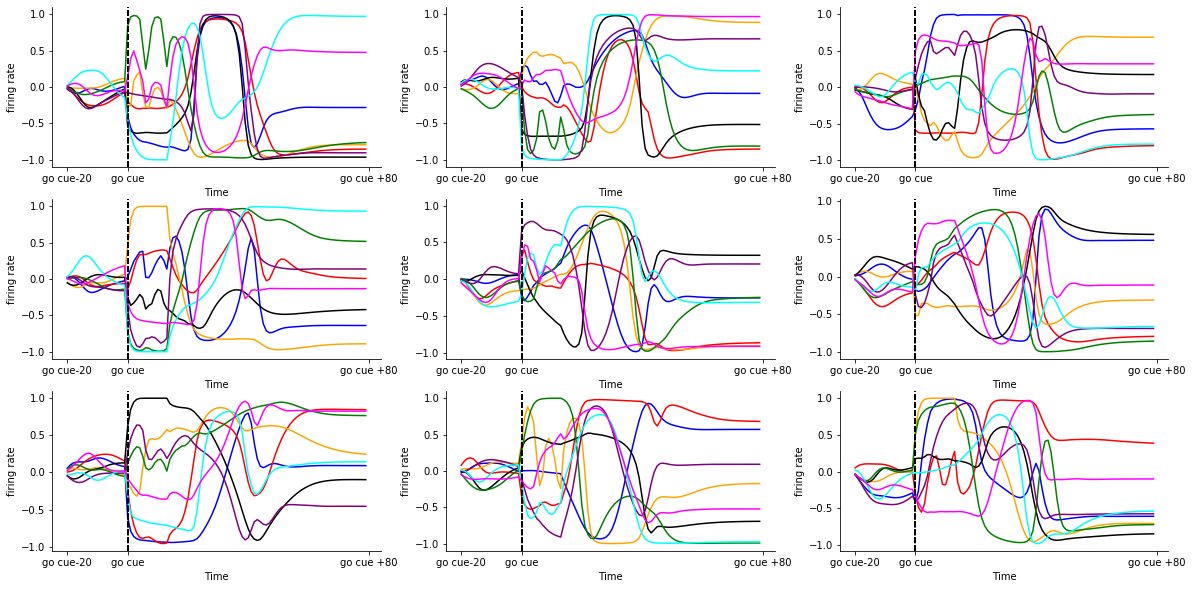

In [153]:
f,ax = plt.subplots(3,3,figsize=[20,10])
colors = np.array(['blue','red','orange','black','green','purple','cyan','magenta'])
n = 0
seq = [0,1,2,3,5,6,8,16]
for i in range(3):
    for j in range(3):
        for k in range(8):
            ax[i,j].plot(hidden[seq[k],n,:],color=colors[k])
            ax[i,j].set_ylabel("firing rate")

            ax[i,j].set_xlabel("Time")
            ax[i,j].spines['top'].set_visible(False)
            ax[i,j].spines['right'].set_visible(False)
            
            ax[i,j].axvline(x=20, color = 'black', linestyle='--')
            ax[i,j].set_xticks([0,20,100])  
            ax[i,j].set_xticklabels(['go cue-20','go cue','go cue +80'])
            n+=1
    
f.savefig('recurrent_pre_curl_example_hiddenUnitsByConditions.pdf',format='pdf')
f.savefig('recurrent_pre_curl_example_hiddenUnitsByConditions.png',format='png')

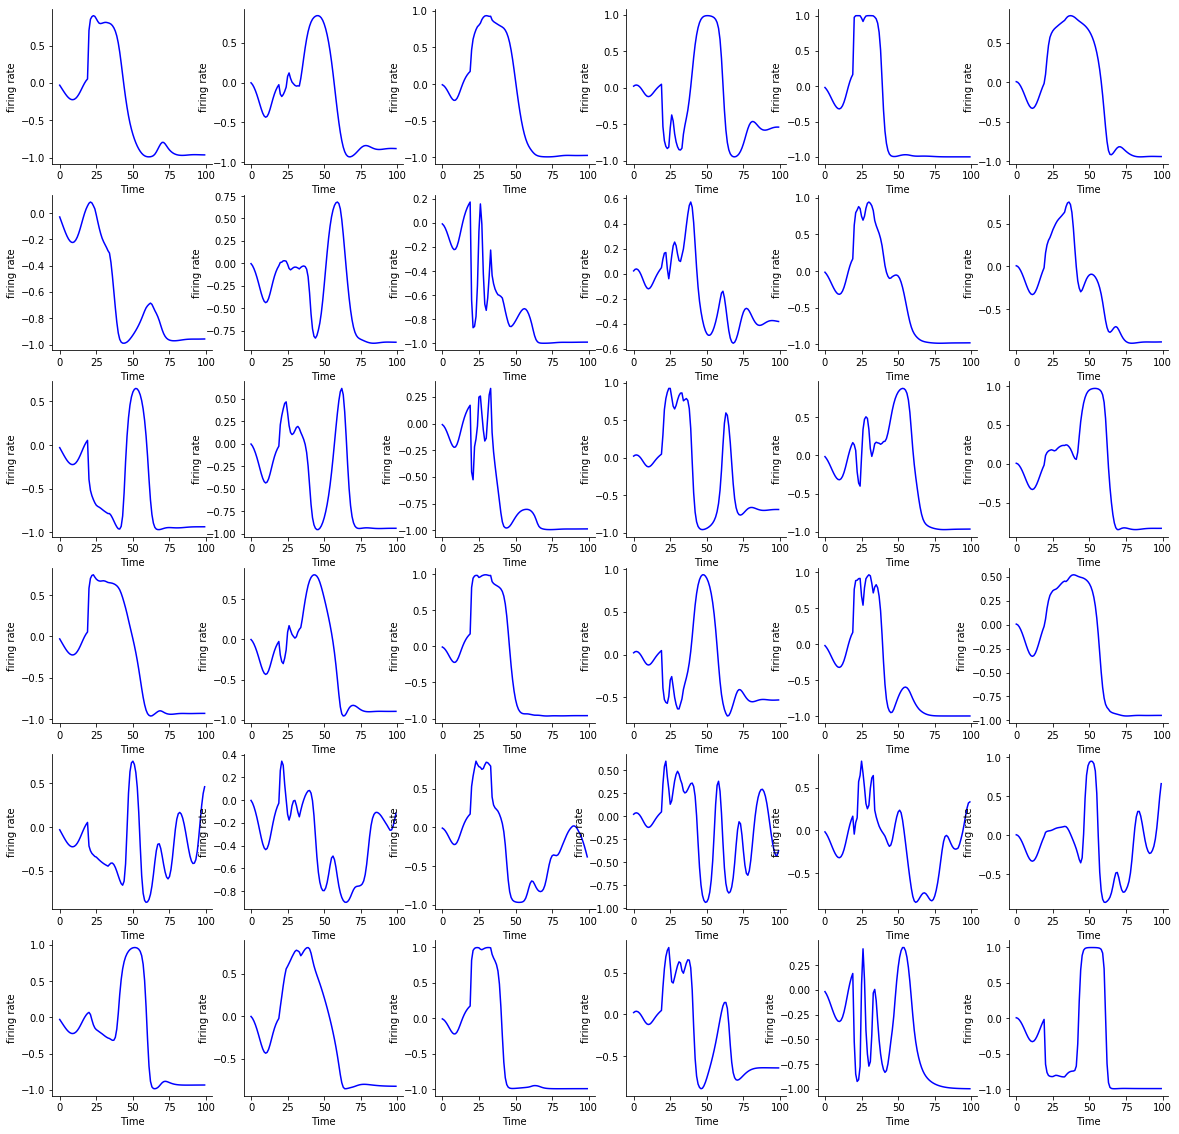

In [59]:
f,ax = plt.subplots(6,6,figsize=[20,20])

for j in range(6):
    for i in range(6):
        ax[j,i].plot(hidden[j,i,:],color='blue')
        ax[j,i].set_ylabel("firing rate")

        ax[j,i].set_xlabel("Time")
        ax[j,i].spines['top'].set_visible(False)
        ax[j,i].spines['right'].set_visible(False)
        
f.savefig('recurrent_pre_curl_example_hiddenUnits.pdf',format='pdf')
f.savefig('recurrent_pre_curl_example_hiddenUnits.png',format='png')

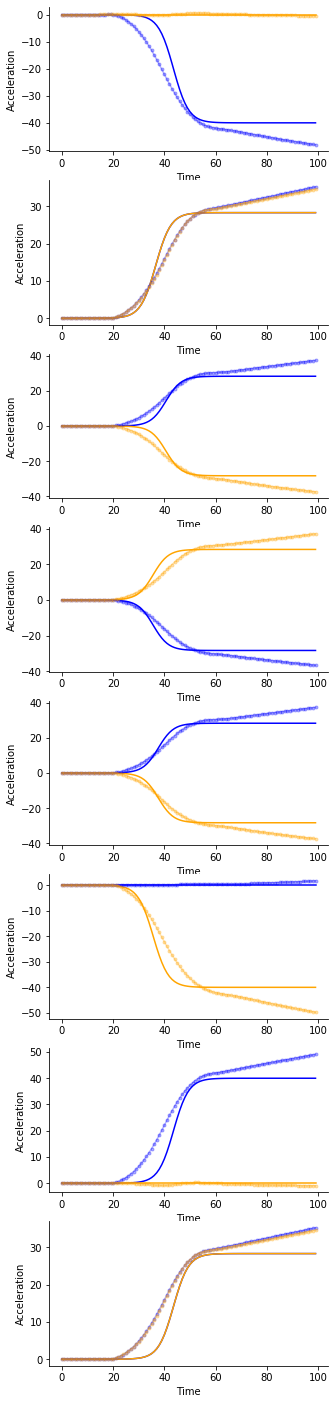

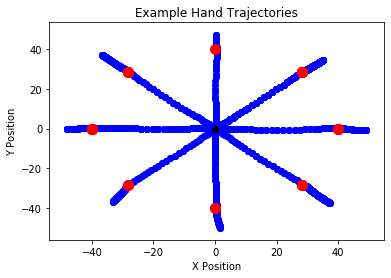

In [125]:
seq = range(25)
f,ax = plt.subplots(n,1,figsize=[5,25])
for j in range(n):
    ax[j].plot(Y[j,0,:].T,color='blue')
    ax[j].plot(Y[j,1,:].T,color='orange')
    ax[j].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j].set_ylabel("Acceleration")
    
    ax[j].set_xlabel("Time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
        
f.savefig('recurrent_pre_curl_example_outputs.pdf',format='pdf')
f.savefig('recurrent_pre_curl_example_outputs.png',format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[seq,0,-1],X[seq,1,-1],color='red',s=100)
ax.scatter(YHAT[seq,-2,:].T,YHAT[seq,-1,:].T,color='blue',zorder=-1)
# ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig('recurrent_pre_curl_example_trajectories.pdf',format='pdf')
f.savefig('recurrent_pre_curl_example_trajectories.png',format='png')

In [170]:
# recursive with curl field
model = torch.load('recursive_curl.pt',map_location=torch.device("cpu"))
# instantiate baseline train test class
rm = rsm.recursive_model()
# set model as the previously fit model
rm.model = model
rm.data_gen.curl=True

In [171]:
# plot example inputs
X,A,AHAT,hidden = rm.test_batch(50)
Y,YHAT =1/100.*np.cumsum(np.cumsum(A,axis=-1),axis=-1), 1./100.*np.cumsum(np.cumsum(AHAT,axis=-1),axis=-1)

print(X.shape,Y.shape,YHAT.shape,CURL.shape,hidden.shape)

RuntimeError: expected device cpu and dtype Float but got device cpu and dtype Long

NameError: name 'figdir' is not defined

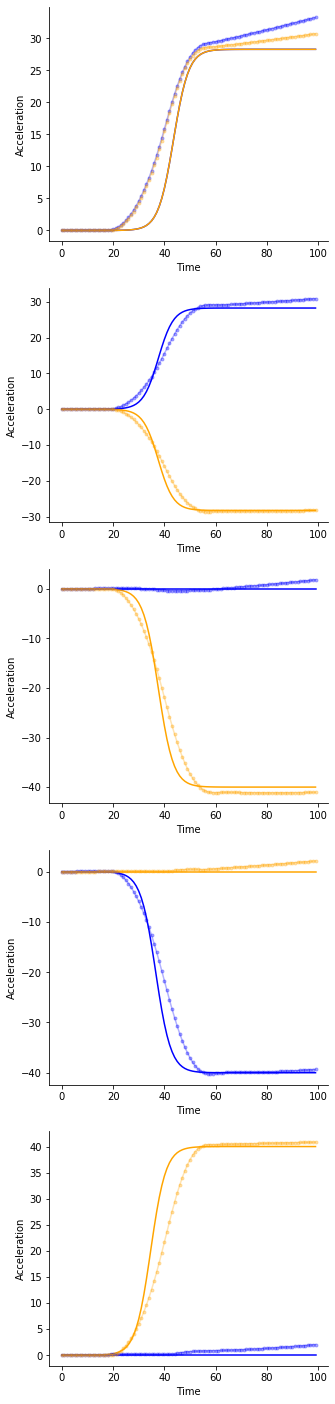

In [156]:
f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(Y[j,0,:].T,color='blue')
    ax[j].plot(Y[j,1,:].T,color='orange')
    ax[j].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j].set_ylabel("Acceleration")
    
    ax[j].set_xlabel("Time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    

    
f.savefig(os.path.join(figdir,"recurrent_curl_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"recurrent_curl_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red',s=100)
ax.scatter(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue',zorder=-1)
ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig(os.path.join(figdir,"recurrent_curl_example_trajectories.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"recurrent_curl_example_trajectories.png"),format='png')

In [163]:
# recursive with curl field
model = torch.load('recursive_post_curl.pt',map_location=torch.device("cpu"))
# instantiate baseline train test class
rm = rsm.recursive_model()
# set model as the previously fit model
rm.model = model
rm.data_gen.curl=False

In [148]:
# plot example inputs
X,A,AHAT,hidden = rm.test_batch(50)
Y,YHAT =1/100.*np.cumsum(np.cumsum(A,axis=-1),axis=-1), 1./100.*np.cumsum(np.cumsum(AHAT,axis=-1),axis=-1)

print(X.shape,Y.shape,YHAT.shape,CURL.shape,hidden.shape)

torch.Size([50, 3, 100]) torch.Size([50, 2, 100]) torch.Size([50, 2, 100]) torch.Size([50, 6, 100]) torch.Size([50, 128, 100])


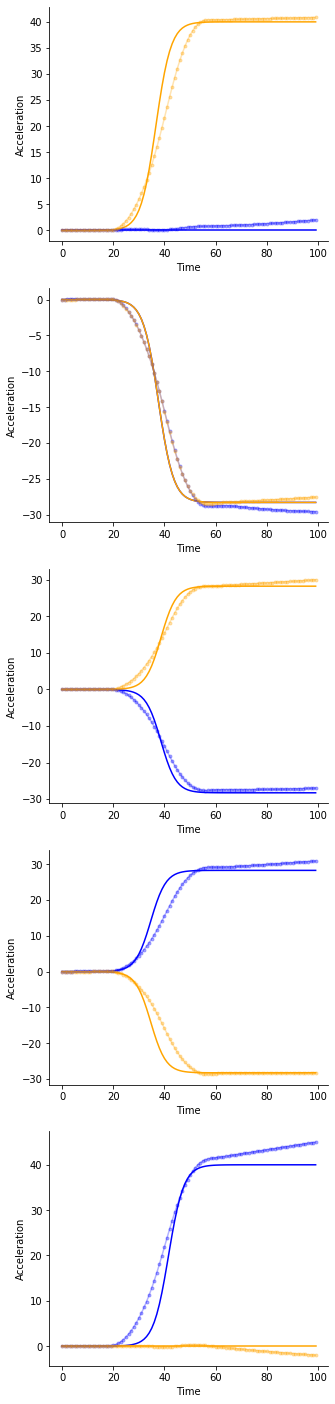

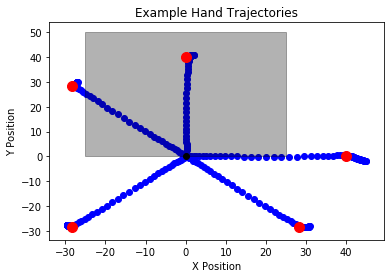

In [149]:
f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(Y[j,0,:].T,color='blue')
    ax[j].plot(Y[j,1,:].T,color='orange')
    ax[j].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j].set_ylabel("Acceleration")
    
    ax[j].set_xlabel("Time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    

    
f.savefig('recurrent_post_curl_example_outputs.pdf',format='pdf')
f.savefig('recurrent_post_curl_example_outputs.png',format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red',s=100)
ax.scatter(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue',zorder=-1)
ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig('recurrent_post_curl_example_trajectories.pdf',format='pdf')
f.savefig('recurrent_post_curl_example_trajectories.png',format='png')